# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [136]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [137]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

import torch
from torch import nn
from IPython.display import clear_output
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

Все ответы на этот и следующие вопросы задачи 1 прикрепил отдельным файлом ("Задача 1")

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$  

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$
$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$
$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$
$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**
Вывод и все ответы к задаче 1 прикрепил отдельным файлом ("Задача 1")

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [138]:
torch_nn = nn.Sequential(
    nn.Linear(in_features=1, out_features=2),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1)
)
torch_nn

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

Возьмем y = cos(x). Поделим на трейн и валидацию в пропорции 4:1

In [139]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.cos(X[:,0])
assert y.shape == (sample_size,)

X_train, X_test, y_train, y_test = \
 [torch.tensor(arr, dtype=torch.float, device='cpu') for arr in train_test_split(X, y, test_size=0.2, random_state=42)]

Обучите нейросеть на этих данных. Используйте код с занятия.

Все данные вместе занимали слишком большой объем, поэтому поделил данные на батчи. Максимальное кол-во эпох выбрал произвольно, но до 100 обычно не доходило. Размер батча выбрал так, чтобы не оставалось лишних точек (чтобы sample_size было кратно batch_size) и чтобы помещалось в памяти. Целевое значение mse выбрал тоже произвольно, но так, чтобы был виден эффект от обучения (достаточно точная аппроксимация данной функции), но обучние не шло слишком долго

In [140]:
num_epochs = 100
batch_size = 250
target_mse = 0.007
mse_loss = nn.MSELoss()

def train_torch_nn(torch_nn, X_train, y_train):
    """
    Обучение НС из торча
    """
    optimizer = torch.optim.SGD(torch_nn.parameters(), lr=0.01)
    for i in range(num_epochs):
        y_preds = []
        for j in tqdm(range(len(y_train)//batch_size), desc=f"Эпоха {i}"):
            X_batch, y_batch = X_train[j*batch_size:(j+1)*batch_size], y_train[j*batch_size:(j+1)*batch_size]
            y_pred = torch_nn(X_batch)[:,0]
            y_preds.append(y_pred)
            loss = mse_loss(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        if loss.item() < target_mse:
            print(f"\nГотово! MSE = {loss.item():.3f}\n")
            break
    return torch_nn

torch_nn = train_torch_nn(torch_nn, X_train, y_train)

Эпоха 8: 100%|██████████| 3200/3200 [00:02<00:00, 1465.20it/s]


Готово! MSE = 0.006



Введем еще несколько полезных методов. Метод mse - просто вычисляет ошибку, но для numpy-массивов и без градиентов. Метод show будет рисовать предикты моделей и реальные данные на одном графике (пригодится в последней задаче), причем для экономии времени и упрощения обработки точки перед отрисовкой прореживаются (слайс ::2000). Метод run_and_compare будет запускать набор моделей на произвольном датасете (тоже пригодится в конце задания)

In [141]:
def mse(y_true, y_pred):
    return np.sum((y_true - y_pred)**2) / len(y_true)

def show(x, y, preds, scores, subset_name):
    '''
    Визуализация аппроксимации
    '''
    plt.figure(figsize=(10, 6))
    plt.scatter(x[::2000], y[::2000], label='Реальные данные', alpha=0.75, linewidth=2)
    for model_name, y_pred in preds.items():
        plt.scatter(x[::2000], y_pred[::2000], label=f'{model_name} (MSE = {scores[model_name]:.3f})', alpha=0.7, linewidth=2)
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.title(f'Качество {subset_name}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    clear_output(wait=True)
    plt.show()

def run_and_compare(models, X_subset, y_subset, subset_name):
    '''
    Прогон моделей на выборке + вызов визуализации
    '''
    preds, scores = {}, {}
    for model_name, model in models.items():
        if 'torch' in model_name:
            with torch.no_grad():
                y_pred = model(X_subset)[:,0].detach()
            preds[model_name], scores[model_name] = y_pred, mse_loss(y_pred, y_subset).detach().item()
            show(X_subset, y_subset, preds, scores, subset_name)
        else:
            y_pred = model.predict(X_subset.numpy())
            preds[model_name], scores[model_name] = torch.tensor(y_pred), mse(y_pred, y_subset.numpy())
            show(X_subset, y_subset, preds, scores, subset_name)

Сначала еще визуализируем предсказания на трейне. Это бывает полезно для контроля переобучения: если ошибка на трейне сильно меньше ошибки на тесте, значит, модель "вызубрила" обучающую выборку и не обладает достаточной обобщающей способностью

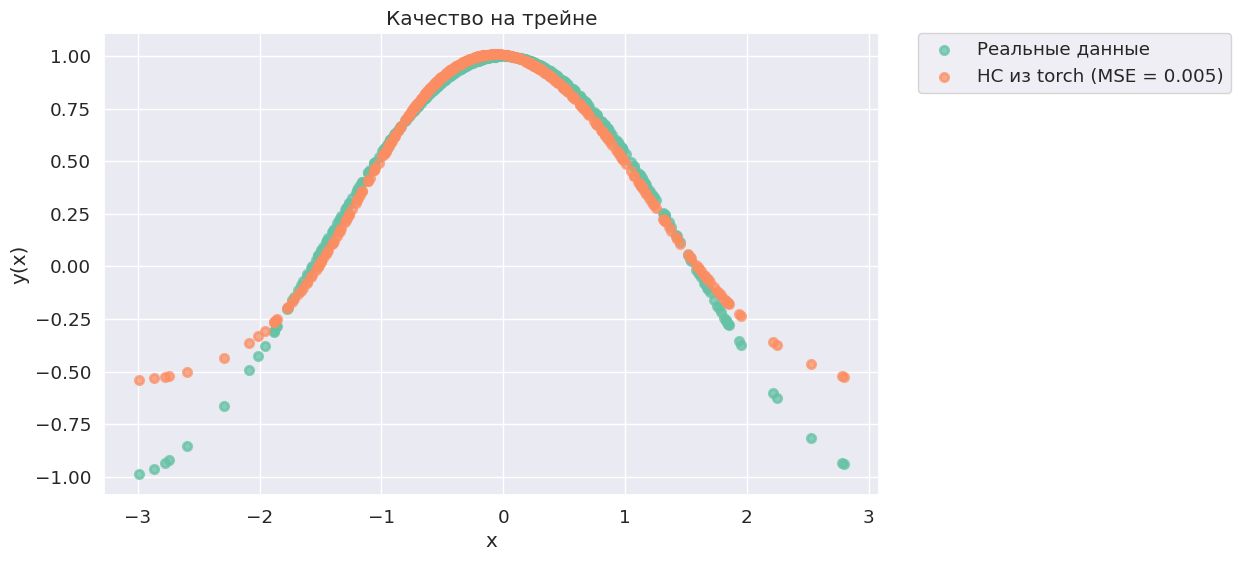

In [142]:
run_and_compare({"НС из torch":torch_nn}, X_train, y_train, 'на трейне')

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

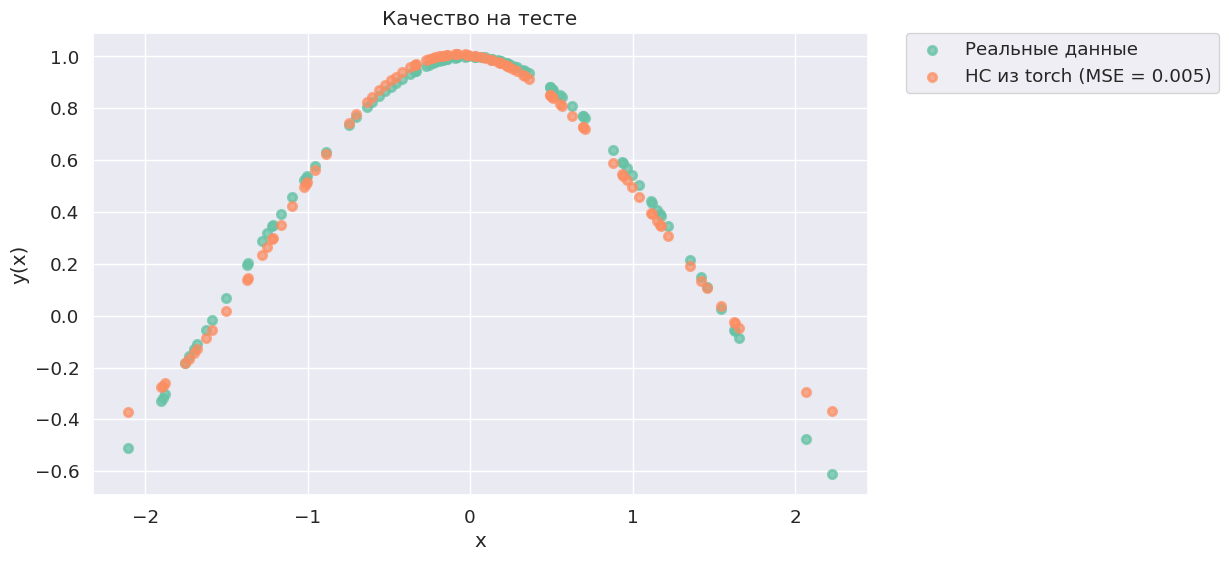

In [143]:
run_and_compare({"НС из torch":torch_nn}, X_test, y_test, 'на тесте')

**Вывод:**
Простой нейросети хватило нескольких эпох, чтобы научиться довольно хорошо аппроксимировать заданную функцию. Предположительно, источник успеха - колоссальный размер обучающей выборки (порядка миллиона точек). Переобучения по графикам не видно

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [144]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1.0 - sigmoid(x))
def mse(y_true, y_pred):
    return np.sum((y_true - y_pred)**2) / len(y_true)

class NN:
    def __init__(self, epochs, lr, target_mse, batch_size):
        """
        Инициализация нейросети
        """
        self.epochs, self.lr, self.target_mse, self.batch_size = epochs, lr, target_mse, batch_size
        self.w1 = np.random.randn(2, 1) * 10
        self.b1 = np.zeros((2, 1))  # с инициализацией биасов zeros вроде работало получше, хотя, возможно, мне просто показалось
        self.w2 = np.random.randn(1, 2) * 10
        self.b2 = np.zeros((1, 1))

    def forward(self, X):
        """
        Прямой проход
        """
        self.z1 = self.w1.dot(X.T) + self.b1
        self.u1 = sigmoid(self.z1)
        self.y_hat = self.w2.dot(self.u1) + self.b2

    def backward(self, X, Y):
        """
        Обратный проход (подсчет градиентов)
        """
        n = X.shape[0]
        self.dw2 = 2 * np.dot(self.y_hat - Y, self.u1.T) / n
        self.db2 = 2 * np.sum(self.y_hat - Y, axis=1, keepdims=True) / n
        self.dz1 = np.multiply(np.dot(self.w2.T, self.y_hat - Y), sigmoid_prime(self.z1))  #sigmoid_prime(self.u1) ?
        self.dw1 = 2 * np.dot(self.dz1, X) / n
        self.db1 = 2 * np.sum(self.dz1, axis=1, keepdims=True) / n

    def step(self):
        """
        Шаг GD
        """
        self.w1 -= self.lr * self.dw1
        self.b1 -= self.lr * self.db1
        self.w2 -= self.lr * self.dw2
        self.b2 -= self.lr * self.db2

    def fit(self, X, Y):
        """
        Обучение нейросети
        """
        for i in range(self.epochs):
            for j in tqdm(range(len(Y)//self.batch_size), desc=f"Эпоха {i}"):
                x_batch = X[j*self.batch_size:(j+1)*self.batch_size]
                y_batch = Y[j*self.batch_size:(j+1)*self.batch_size]
                self.forward(x_batch)  # y_hat сохраняется внутри, так оказалось чуть удобнее
                loss = mse(y_batch, self.y_hat)
                self.backward(x_batch, y_batch)
                self.step()
            if loss < self.target_mse:
                print(f"\nГотово! MSE = {loss:.3f}\n")
                break

    def predict(self, X):
        """
        Получение предсказания
        """
        self.forward(X)
        return self.y_hat[0,:]  # подгон формы массива

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

Учитывая, что у нас есть только один признак, линейная регрессия подберет лешь два параметра: w и b, такие что y_hat = w*x + b. То есть предсказания линейной регрессии будут представлять из себя прямую, и естественно ожидать, что линейная регрессия справится с задачей хуже всего (по метрике mse)

In [145]:
nn = NN(epochs=100, lr=1e-2, target_mse=0.007, batch_size=250)
nn.fit(X_train.numpy(), y_train.numpy())

lr = LinearRegression()
lr.fit(X_train.numpy(), y_train.numpy())
print('lr params:', lr.coef_[0], lr.intercept_)

Эпоха 4: 100%|██████████| 3200/3200 [00:00<00:00, 7697.01it/s]


Готово! MSE = 0.006

lr params: 0.0013472793 0.60664725


Сначала визуализируем предсказания на трейне (для контроля переобучения, как писал выше)

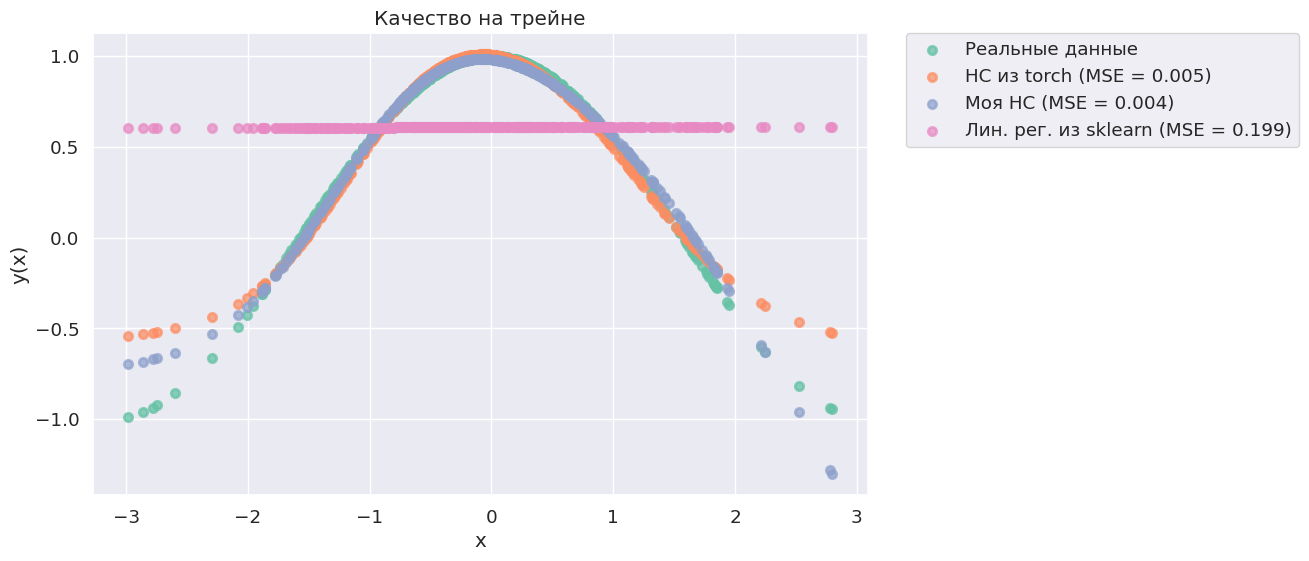

In [146]:
run_and_compare({
    "НС из torch":torch_nn,
    "Моя НС":nn,
    "Лин. рег. из sklearn":lr,
}, X_train, y_train, 'на трейне')

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

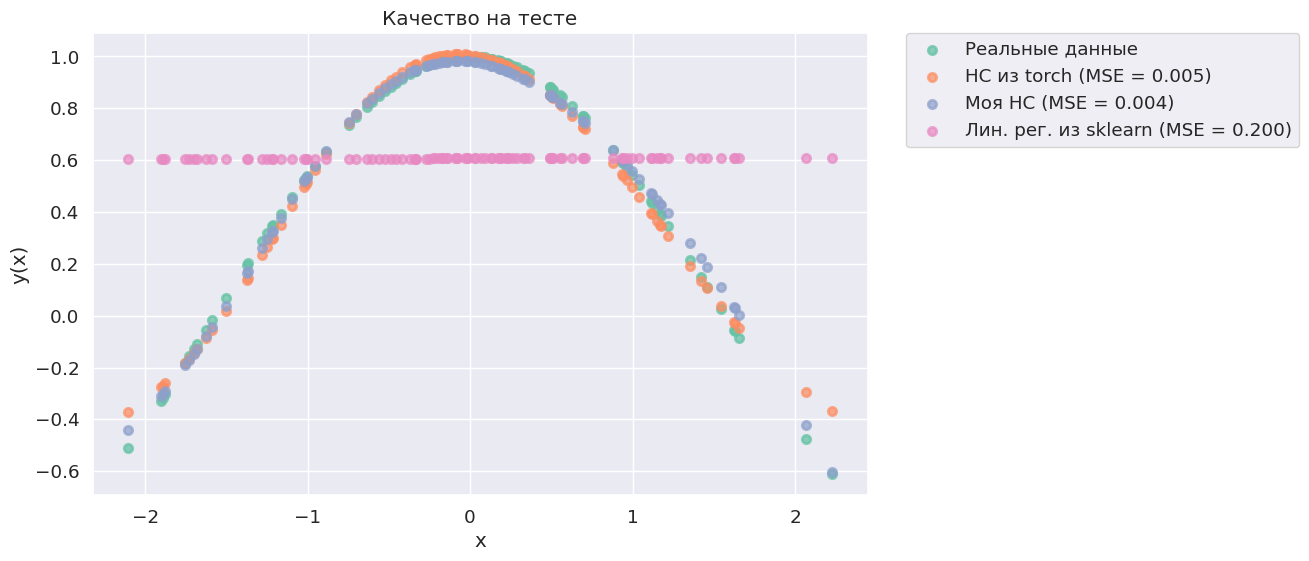

In [147]:
run_and_compare({
    "НС из torch":torch_nn,
    "Моя НС":nn,
    "Лин. рег. из sklearn":lr,
}, X_test, y_test, 'на тесте')

Промежуточный вывод: лучше всего с задачей справились нейросети, а хуже всего - линейная регрессия (причем, как и предполагалось, ее предсказания ложатся на прямую). Кроме того, по графикам mse не видно пеереобучения (в случае лин.рег. - видно недообучение, т.е. двух параметров недостаточно, и модель получилась слишком слабой)

Повторите вычисления для другой нелинейной функции $y(x)$.

Возьмем функцию y = x^3 - 2x

In [148]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = X[:,0]**3 - 2*X[:,0]
X_train, X_test, y_train, y_test = \
 [torch.tensor(arr, dtype=torch.float, device='cpu') for arr in train_test_split(X, y, test_size=0.2, random_state=42)]

torch_nn = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=2),
    torch.nn.Sigmoid(),
    torch.nn.Linear(in_features=2, out_features=1)
)
torch_nn = train_torch_nn(torch_nn, X_train, y_train)

nn = NN(epochs=100, lr=1e-2, target_mse=0.007, batch_size=250)
nn.fit(X_train.numpy(), y_train.numpy())

lr = LinearRegression()
lr.fit(X_train.numpy(), y_train.numpy())

Эпоха 99: 100%|██████████| 3200/3200 [00:00<00:00, 8611.74it/s]


LinearRegression()

Сначала визуализируем предсказания на трейне (для контроля переобучения, аналогично)

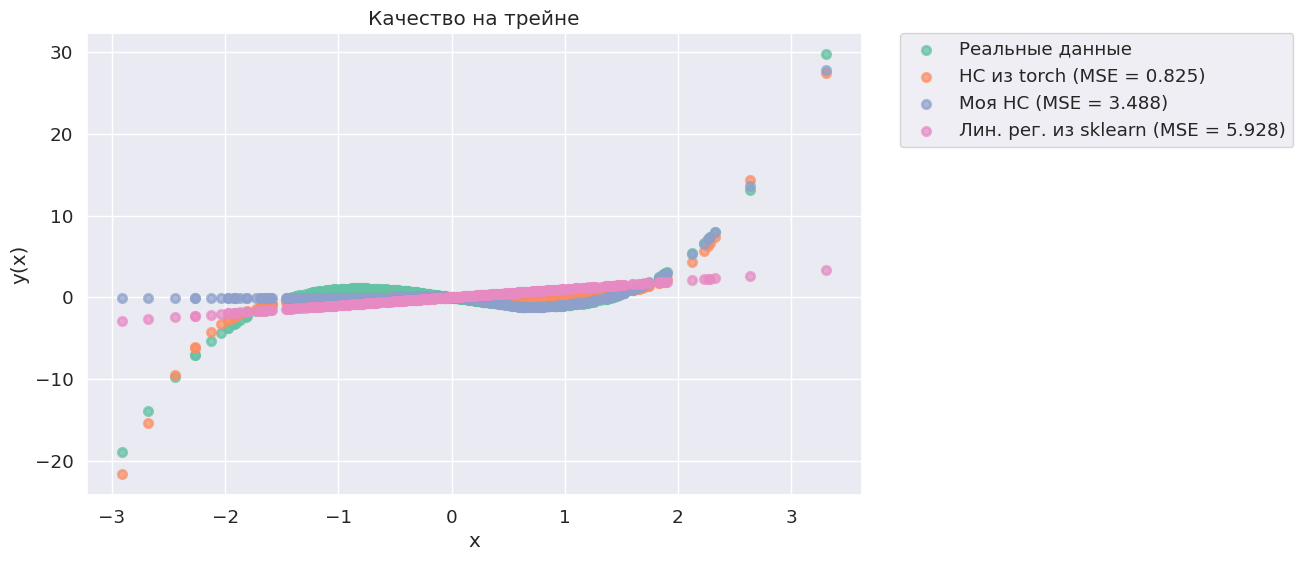

In [149]:
run_and_compare({
    "НС из torch":torch_nn,
    "Моя НС":nn,
    "Лин. рег. из sklearn":lr,
}, X_train, y_train, 'на трейне')

А теперь - на тесте

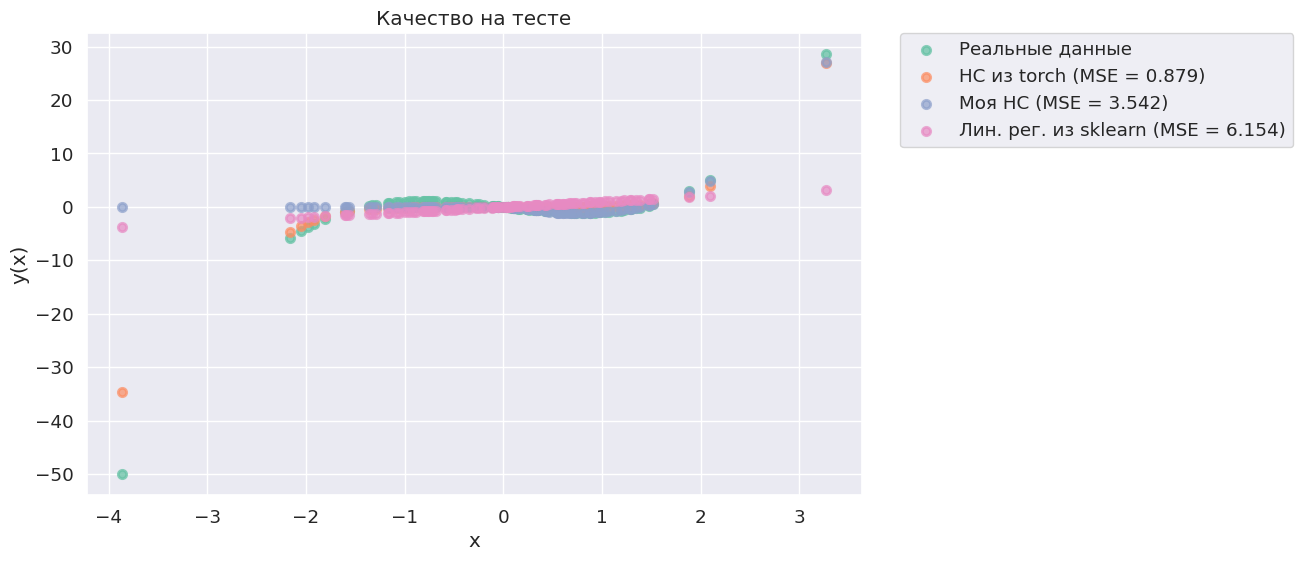

In [150]:
run_and_compare({
    "НС из torch":torch_nn,
    "Моя НС":nn,
    "Лин. рег. из sklearn":lr,
}, X_test, y_test, 'на тесте')

Промежуточный вывод: новая функция оказалась сложнее для всех моделей, однако снова лучше всего с задачей справились нейросети, хуже всего - линейная регрессия (и ее предсказания снова ложатся на прямую). Думаю, можно было бы добиться более хороших резулльтатов даже с текущей архитектурой НС, если попробовать разные значения learning_rate (в том числе скедулеры) и пообучать больше эпох. Если менять архитектуру, то возможно, стоит добавить в модель больше слоев и нейронов на слой, плюс регуляризацию (например, к лоссу добавить слагаемое с нормой весов, как делалось в одном из прошлых дз)  


**Вывод:**
в ходе работы удалось реализовать нейросеть заданной архитектуры двумя способами (через torch + практически с нуля в numpy) и сравнить два подхода с линейной регрессией. Можно сделать вывод, что указанная двухслойная архитектура (и скорее, нейросети в целом) - довольно мощный инструмент, позвояющий аппроксимировать произвольные нелинейные функции, явно обгоняя более простые подходы по качеству (mse)  